# Classification Seeds Data Set

Na avaliação será levado em conta:
1. Corretude das tarefas solicitadas
2. Qualidade e boas práticas de codificação
3. Eficiência na manipulação dos dados

O objetivo deste quarto projeto prático da disciplina Redes Neurais Artificias é conduzir um processo de Aprendizado de Máquina com tarefa de classificação multiclasse que utilize redes neurais artificiais do tipo multilayer perceptron para endereçar esta tarefa.

Cada equipe deve produzir um Jupyter Notebook contendo boas práticas de programação que ilustrem os passos detalhados desta tarefa, com justificativas e comentários sempre que necessários.

- Kid Mendes de Oliveira Neto - 1615310011
- Wilson Calixto Cordovil Junior - 1515310026

#### Importação das Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from math import sqrt
%matplotlib inline

#### Obtenha o seeds dataset do repositório da Universidade de California em Irvine

In [2]:
seeds_dataset = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)
seeds_dataset.columns = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "length groove", "wheat"]
seeds_dataset.head()

,area,perimeter,compactness,length,width,asymmetry,length groove,wheat
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


#### Efetue a partição do dataset 

In [3]:
X_train = seeds_dataset.drop('wheat', axis=1) 
Y_train = seeds_dataset['wheat']

#### Utilizar a regra da pirâmide geométrica para identificar o número de neurônios nas camadas ocultas

In [4]:
def geometric_pyramid(alpha, ni, no):
    return int(alpha * sqrt(ni*no))

#### Preparando os parâmetros o qual deve variar a função de ativação e o número de neurônios nas camadas ocultas.

In [5]:
#Quantidade de neurônios em cada camada oculta. Ex: (13,), (2,), (6,7), (9,)
hidden_layer_sizes = [
    (geometric_pyramid(0.5, 7, 3),), (geometric_pyramid(2, 7, 3),), (geometric_pyramid(3, 7, 3),),
    (geometric_pyramid(0.5, 7, 3)//2, (geometric_pyramid(0.5, 7, 3) - geometric_pyramid(0.5, 7, 3)//2)), 
    (geometric_pyramid(2, 7, 3)//2,(geometric_pyramid(2, 7, 3) - geometric_pyramid(2, 7, 3)//2)), 
    (geometric_pyramid(3, 7, 3)//2,(geometric_pyramid(3, 7, 3) - geometric_pyramid(3, 7, 3)//2))
]

#Dicionário que servirá para a variação dos parâmetros na Rede Neural
param_grid = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': hidden_layer_sizes,
    'learning_rate_init': [0.01, 0.001, 0.0005, 0.0001],
}

#### Busca em grade utilizando o solver lbfgs

In [8]:
mlp = MLPClassifier(solver='lbfgs')
grid_lbfgs = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')
grid_lbfgs.fit(X_train, Y_train)

print("Função de ativação: {}\nQuantidade de neurônios nas camadas ocultas: {}\nTaxa de Aprendizagem: {}\nMelhor acurácia: {}"
      .format(grid_lbfgs.best_params_['activation'], grid_lbfgs.best_params_['hidden_layer_sizes'],
              grid_lbfgs.best_params_['learning_rate_init'], grid_lbfgs.best_score_))

Função de ativação: identity
Quantidade de neurônios nas camadas ocultas: (9,)
Taxa de Aprendizagem: 0.01
Melhor acurácia: 0.9428571428571428


#### Gráfico para a comparação de desempenho da acurácia agrupando de acordos com a quatidade de camadas ocultas. Solver: lbfgs

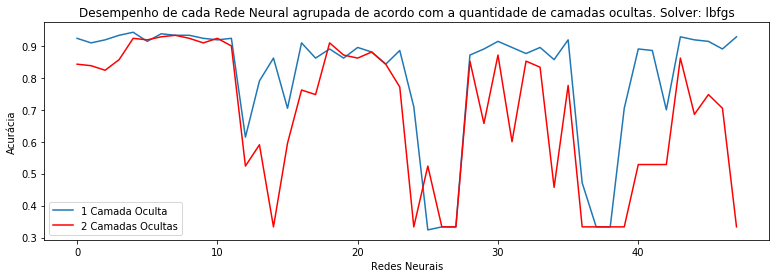

In [9]:
accuracys_one_hidden_layes = [x[1] for x in grid_lbfgs.grid_scores_ if len(x[0]['hidden_layer_sizes']) == 1]
accuracys_two_hidden_layes = [x[1] for x in grid_lbfgs.grid_scores_ if len(x[0]['hidden_layer_sizes']) == 2]

plt.figure(figsize=(13,4))

plt.plot(accuracys_one_hidden_layes, label='1 Camada Oculta')
plt.plot(accuracys_two_hidden_layes, c='r', label='2 Camadas Ocultas')

plt.title('Desempenho de cada Rede Neural agrupada de acordo com a quantidade de camadas ocultas. Solver: lbfgs')
plt.xlabel('Redes Neurais')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

#### Busca em grade utilizando o solver sgd

In [10]:
mlp = MLPClassifier(solver='sgd')
grid_sgd = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')
grid_sgd.fit(X_train, Y_train)

print("Função de ativação: {}\nQuantidade de neurônios nas camadas ocultas: {}\nTaxa de Aprendizagem: {}\nMelhor acurácia: {}"
      .format(grid_sgd.best_params_['activation'], grid_sgd.best_params_['hidden_layer_sizes'],
              grid_sgd.best_params_['learning_rate_init'], grid_sgd.best_score_))

Função de ativação: tanh
Quantidade de neurônios nas camadas ocultas: (13,)
Taxa de Aprendizagem: 0.01
Melhor acurácia: 0.8285714285714286


#### Gráfico para a comparação de desempenho da acurácia agrupando de acordos com a quatidade de camadas ocultas. Solver: sgd

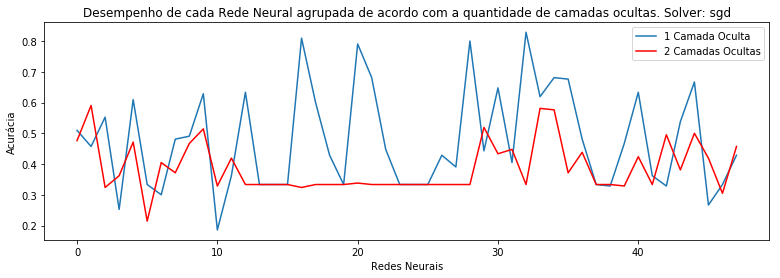

In [11]:
accuracys_one_hidden_layes = [x[1] for x in grid_sgd.grid_scores_ if len(x[0]['hidden_layer_sizes']) == 1]
accuracys_two_hidden_layes = [x[1] for x in grid_sgd.grid_scores_ if len(x[0]['hidden_layer_sizes']) == 2]

plt.figure(figsize=(13,4))

plt.plot(accuracys_one_hidden_layes, label='1 Camada Oculta')
plt.plot(accuracys_two_hidden_layes, c='r', label='2 Camadas Ocultas')

plt.title('Desempenho de cada Rede Neural agrupada de acordo com a quantidade de camadas ocultas. Solver: sgd')
plt.xlabel('Redes Neurais')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

#### Busca em grade utilizando o solver adam

In [12]:
mlp = MLPClassifier(solver='adam')
grid_adam = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')
grid_adam.fit(X_train, Y_train)

print("Função de ativação: {}\nQuantidade de neurônios nas camadas ocultas: {}\nTaxa de Aprendizagem: {}\nMelhor acurácia: {}"
      .format(grid_adam.best_params_['activation'], grid_adam.best_params_['hidden_layer_sizes'],
              grid_adam.best_params_['learning_rate_init'], grid_adam.best_score_))

Função de ativação: logistic
Quantidade de neurônios nas camadas ocultas: (13,)
Taxa de Aprendizagem: 0.01
Melhor acurácia: 0.9095238095238095


#### Gráfico para a comparação de desempenho da acurácia agrupando de acordos com a quatidade de camadas ocultas. Solver: adam

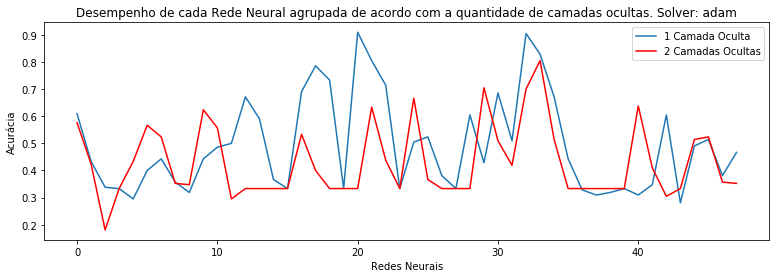

In [13]:
accuracys_one_hidden_layes = [x[1] for x in grid_adam.grid_scores_ if len(x[0]['hidden_layer_sizes']) == 1]
accuracys_two_hidden_layes = [x[1] for x in grid_adam.grid_scores_ if len(x[0]['hidden_layer_sizes']) == 2]

plt.figure(figsize=(13,4))

plt.plot(accuracys_one_hidden_layes, label='1 Camada Oculta')
plt.plot(accuracys_two_hidden_layes, c='r', label='2 Camadas Ocultas')

plt.title('Desempenho de cada Rede Neural agrupada de acordo com a quantidade de camadas ocultas. Solver: adam')
plt.xlabel('Redes Neurais')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

#### Gráfico para a comparação das acurácias das Redes Neurais de acordo com o Solver

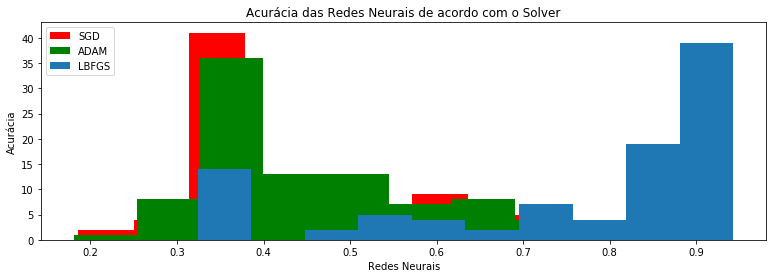

In [14]:
plt.figure(figsize=(13,4))

plt.hist([x[1] for x in grid_sgd.grid_scores_], color='r', label='SGD')
plt.hist([x[1] for x in grid_adam.grid_scores_], color='g', label='ADAM')
plt.hist([x[1] for x in grid_lbfgs.grid_scores_], label='LBFGS')

plt.title('Acurácia das Redes Neurais de acordo com o Solver')
plt.xlabel('Redes Neurais')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

#### Justificativas acerca dos parâmetros ao qual foram variados

A escolha de variar os parâmetros (função de ativação, número de neurônios nas camadas ocultas e taxa de aprendizagem) foi para identificar quais seriam a melhor combinação de parâmetros para esse dataset com o objetivo de obter uma melhor acurácia ao treinar a rede neural.

##### Resultados obtidos

Ao plotar três gráficos comparando a quantidade de camadas ocultas pode-se chegar a conclusão que a RNA com uma camada oculta obteve a melhor acurácia obtida, não excluindo as RNA's com duas camadas ocultas que obtiveram resultados próximos a melhor acurácia, como pode ser visto no primeiro gráfico.

A melhor taxa de aprendizagem obtida com a melhor acurácia para todos os solvers: 0.01

A melhor função de ativação para o solver:
- lbfgs => identidade;
- sgd => tanh; 
- adam => logística;

#### Justificativa acerca do método de otimização a ser utilizado para treinar todas as redes.

O melhor método de otimização a ser utilizado foi o solver lbfgs, pois de acordo com a documentação do Scikit learn: "For small datasets, however, ‘lbfgs’ can converge faster and perform better", o que converge com a idéia do dataset pois é pequeno então a performance seria melhor e a convergência seria mais rápida compara aos outros solvers.